# Importing All Libraries

In [1]:
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
from sklearn import metrics
%matplotlib inline


# Loading Data

In [2]:
fullfileName='C:/Users/vishal sharma/Desktop/creditcardcsvpresent.csv'
df=pd.read_csv(fullfileName)

In [3]:
print(df.columns)

Index(['Merchant_id', 'Average Amount/transaction/day', 'Transaction_amount',
       'Is declined', 'Total Number of declines/day', 'isForeignTransaction',
       'isHighRiskCountry', 'Daily_chargeback_avg_amt', '6_month_avg_chbk_amt',
       '6-month_chbk_freq', 'isFradulent'],
      dtype='object')


In [4]:
print(df.shape)

(3075, 11)


In [5]:
print(df.describe())

        Merchant_id  Average Amount/transaction/day  Transaction_amount  \
count  3.075000e+03                     3075.000000         3075.000000   
mean   5.026634e+09                      515.026556         9876.399210   
std    9.870778e+08                      291.906978        10135.331016   
min    3.160041e+09                        4.011527            0.000000   
25%    4.170814e+09                      269.788047         2408.781147   
50%    5.025578e+09                      502.549575         6698.891856   
75%    5.889625e+09                      765.272803        14422.568935   
max    6.665906e+09                     2000.000000       108000.000000   

       Total Number of declines/day  Daily_chargeback_avg_amt  \
count                   3075.000000               3075.000000   
mean                       0.957398                 55.737561   
std                        2.192391                206.634779   
min                        0.000000                  0.000000   

In [6]:
print(df.head())


   Merchant_id  Average Amount/transaction/day  Transaction_amount  \
0   3160040998                           100.0              3000.0   
1   3160040998                           100.0              4300.0   
2   3160041896                           185.5              4823.0   
3   3160141996                           185.5              5008.5   
4   3160241992                           500.0             26000.0   

  Is declined  Total Number of declines/day isForeignTransaction  \
0           N                             5                    Y   
1           N                             5                    Y   
2           Y                             5                    N   
3           Y                             8                    N   
4           N                             0                    Y   

  isHighRiskCountry  Daily_chargeback_avg_amt  6_month_avg_chbk_amt  \
0                 Y                         0                   0.0   
1                 Y         

# Analysing Data

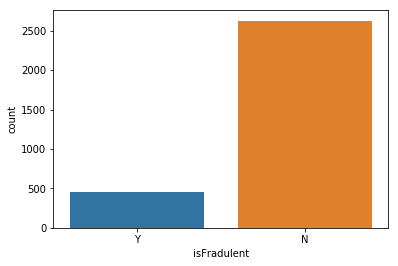

In [7]:
sns.countplot(x="isFradulent",data=df)

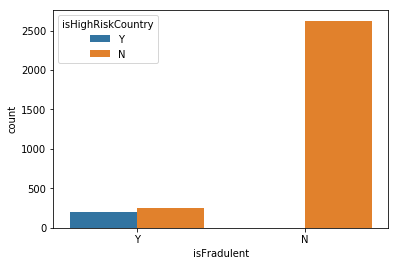

In [8]:
sns.countplot(x="isFradulent",hue="isHighRiskCountry",data=df)

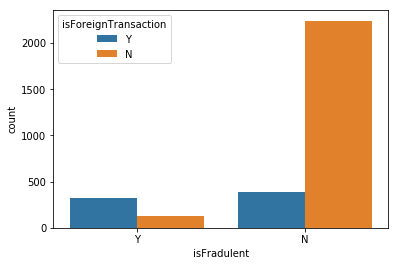

In [9]:
sns.countplot(x="isFradulent",hue="isForeignTransaction",data=df)

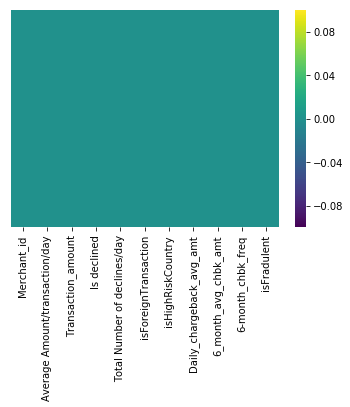

In [10]:
sns.heatmap(df.isnull(), yticklabels=False,cmap='viridis')

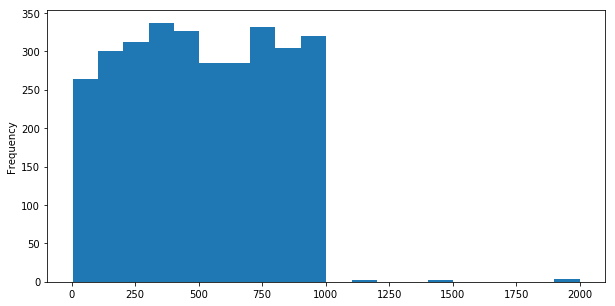

In [11]:
df["Average Amount/transaction/day"].plot.hist(bins=20, figsize=(10,5))

In [12]:
df.loc[df['isFradulent']=='Y', 'isFradulent'] = 1
df.loc[df['isFradulent']=='N', 'isFradulent'] = 0
df.loc[df['Is declined']=='N', 'Is declined'] = 0
df.loc[df['Is declined']=='Y', 'Is declined'] = 1
df.loc[df['isHighRiskCountry']=='N', 'isHighRiskCountry'] = 0
df.loc[df['isHighRiskCountry']=='Y', 'isHighRiskCountry'] = 1
df.loc[df['isForeignTransaction']=='N', 'isForeignTransaction'] = 0
df.loc[df['isForeignTransaction']=='Y', 'isForeignTransaction'] = 1




df.head()


,Merchant_id,Average Amount/transaction/day,Transaction_amount,Is declined,Total Number of declines/day,isForeignTransaction,isHighRiskCountry,Daily_chargeback_avg_amt,6_month_avg_chbk_amt,6-month_chbk_freq,isFradulent
0,3160040998,100.0,3000.0,0,5,1,1,0,0.0,0,1
1,3160040998,100.0,4300.0,0,5,1,1,0,0.0,0,1
2,3160041896,185.5,4823.0,1,5,0,0,0,0.0,0,1
3,3160141996,185.5,5008.5,1,8,0,0,0,0.0,0,1
4,3160241992,500.0,26000.0,0,0,1,1,800,677.2,6,1


In [13]:
fraud=df[df['isFradulent']==1]
valid=df[df['isFradulent']==0]
print(fraud,valid)


     Merchant_id  Average Amount/transaction/day  Transaction_amount  \
0     3160040998                      100.000000         3000.000000   
1     3160040998                      100.000000         4300.000000   
2     3160041896                      185.500000         4823.000000   
3     3160141996                      185.500000         5008.500000   
4     3160241992                      500.000000        26000.000000   
5     3160241992                      500.000000        27000.000000   
6     3160272997                      262.500000        11287.500000   
7     3162041996                      185.500000        11130.000000   
8     3162041996                      185.500000         6121.500000   
9     3162041996                      185.500000         7049.000000   
10    3356298138                      166.788473         4836.865717   
11    3359162473                      444.997014        21804.853710   
12    3359690891                      152.451565         4116.19

In [14]:
X= df.drop("isFradulent",axis=1)
y= df["isFradulent"]


In [15]:
outlier_fraction=len(fraud)/float(len(valid))

In [16]:
print(outlier_fraction)
print('Fraud cases: {}',format(len(fraud)))
print('Valid cases: {}',format(len(valid)))


0.1705367339170156
Fraud cases: {} 448
Valid cases: {} 2627


# Splitting the Datasets into training and test set

In [17]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.23,random_state=1)

In [18]:
print(x_train.shape)

(2367, 10)


In [19]:
print(x_test.shape)

(708, 10)


In [20]:
print(y_train.shape)

(2367,)


In [21]:
print(y_test.shape)

(708,)


# Training the Data using Logistic Regression

In [22]:
from sklearn.linear_model import LogisticRegression
logisticReg=LogisticRegression()
logisticReg.fit(x_train,y_train)
prediction=logisticReg.predict(x_test)


C:\Users\vishal sharma\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


# Testing Data and calculating accuracy

In [23]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,prediction)

0.8516949152542372

In [24]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,prediction)


array([[603,   0],
       [105,   0]], dtype=int64)

In [25]:
xnew=[[4538998799,806.7868534,9681.442241,0,0,0,0,0,0,0]]
result=logisticReg.predict(xnew)
if str(result) == "[0]":
    print("Valid Transaction")
else:
    print("Fraudulent transaction")

Valid Transaction


# Training the Data using Decision Tree

In [26]:
from sklearn.tree import DecisionTreeClassifier
clf_entropy=DecisionTreeClassifier(criterion="entropy",random_state=100,max_depth=3,min_samples_leaf=5)
clf_entropy.fit(x_train,y_train)
y_pred_en=clf_entropy.predict(x_test)

# Testing Data and calculating accuracy

In [27]:
accuracy_score(y_test,y_pred_en)

0.963276836158192

In [28]:
confusion_matrix(y_test,y_pred_en)


array([[598,   5],
       [ 21,  84]], dtype=int64)

In [29]:
xnewt=[[4538998799,806.7868534,9681.442241,0,0,0,0,0,0,0]]
resultt=logisticReg.predict(xnew)
if str(resultt) == "[0]":
    print("Valid Transaction")
else:
    print("Fraudulent transaction")

Valid Transaction


# Training the Data using K-Nearest Neighbours

In [30]:
from sklearn.neighbors import KNeighborsClassifier
KNN = KNeighborsClassifier(n_neighbors=11,p=2,metric='euclidean')
KNN.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
           metric_params=None, n_jobs=None, n_neighbors=11, p=2,
           weights='uniform')

# Testing Data and calculating accuracy

In [31]:
y_pred_enk=KNN.predict(x_test)
accuracy_score(y_test,y_pred_enk)

0.865819209039548

In [32]:
confusion_matrix(y_test,y_pred_enk)

array([[600,   3],
       [ 92,  13]], dtype=int64)

In [33]:
xnewk=[[4538998799,806.7868534,9681.442241,0,0,0,0,0,0,0]]
resultk=logisticReg.predict(xnew)
if str(resultk) == "[0]":
    print("Valid Transaction")
else:
    print("Fraudulent transaction")

Valid Transaction
